In [17]:
# Import the Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

15.349993102353409 -171.13444000383245
2.4366289250020543 -29.63594093648939
-44.98017124065562 -31.868672667267475
-5.25729666706836 145.99558268441075
-10.185782112194232 -66.63648124873556
18.87045026243024 -148.2315120982668
23.74065645654106 41.471842172233096
57.64083592500174 -12.37007717535468
-73.8130404714963 13.844691988592501
45.57729812946127 177.16946277817323
-40.030686174761264 80.69820044376553
-17.315742864578823 -44.55380373404989
-4.581698685992777 -25.503888859231637
67.49486250477483 176.7767310735751
64.91016115918217 133.163803242577
-4.269281585043373 -38.42544196415389
-78.7719947927588 69.552115134091
49.40070223125653 118.6194345414043
-88.36243215148032 -74.56267312650955
-33.20639381172123 -43.44718388229438
-84.57253878497414 38.05466676583205
-66.31761789710433 177.67136346401963
-24.974157512212514 123.0206172080882
-89.287195064265 75.93876635860411
52.59501526774082 35.02263004734519
-76.54575603447879 -35.75689656053581
-78.03841274242113 89.94098559

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [8]:
# Import the requests library
import requests 

# Import the API key
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | touros
Processing Record 3 of Set 1 | cidreira
Processing Record 4 of Set 1 | madang
Processing Record 5 of Set 1 | placido de castro
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | mecca
Processing Record 8 of Set 1 | ballina
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | bambous virieux
Processing Record 12 of Set 1 | varzea da palma
Processing Record 13 of Set 1 | cabedelo
Processing Record 14 of Set 1 | leningradskiy
Processing Record 15 of Set 1 | verkhoyansk
Processing Record 16 of Set 1 | chorozinho
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | oktyabrskiy
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | laguna
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | k

Processing Record 36 of Set 4 | port lincoln
Processing Record 37 of Set 4 | castro
Processing Record 38 of Set 4 | price
Processing Record 39 of Set 4 | mrirt
City not found. Skipping...
Processing Record 40 of Set 4 | baykit
Processing Record 41 of Set 4 | el sauce
Processing Record 42 of Set 4 | codrington
Processing Record 43 of Set 4 | anadyr
Processing Record 44 of Set 4 | tabuk
Processing Record 45 of Set 4 | yankton
Processing Record 46 of Set 4 | waipawa
Processing Record 47 of Set 4 | formoso do araguaia
City not found. Skipping...
Processing Record 48 of Set 4 | tezu
Processing Record 49 of Set 4 | prado
Processing Record 50 of Set 4 | gwadar
Processing Record 1 of Set 5 | brae
Processing Record 2 of Set 5 | torbay
Processing Record 3 of Set 5 | oranjemund
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | muisne
Processing Record 6 of Set 5 | kuching
Processing Record 7 of Set 5 | chipinge
Processing Record 8 of Set 5 | ozernovskiy
Processing Record 9 of 

Processing Record 29 of Set 8 | alugan
Processing Record 30 of Set 8 | henties bay
Processing Record 31 of Set 8 | lerwick
Processing Record 32 of Set 8 | san quintin
Processing Record 33 of Set 8 | nuuk
Processing Record 34 of Set 8 | tessalit
Processing Record 35 of Set 8 | aripuana
Processing Record 36 of Set 8 | waggaman
Processing Record 37 of Set 8 | berlin
Processing Record 38 of Set 8 | nonoichi
Processing Record 39 of Set 8 | emerald
Processing Record 40 of Set 8 | barbar
City not found. Skipping...
Processing Record 41 of Set 8 | morros
Processing Record 42 of Set 8 | filingue
Processing Record 43 of Set 8 | chuy
Processing Record 44 of Set 8 | lyngseidet
Processing Record 45 of Set 8 | avarua
Processing Record 46 of Set 8 | luderitz
Processing Record 47 of Set 8 | namibe
Processing Record 48 of Set 8 | itarema
Processing Record 49 of Set 8 | davila
Processing Record 50 of Set 8 | matara
Processing Record 1 of Set 9 | gunnedah
Processing Record 2 of Set 9 | muros
Processing R

Processing Record 19 of Set 12 | yasothon
Processing Record 20 of Set 12 | biak
Processing Record 21 of Set 12 | naze
Processing Record 22 of Set 12 | kopaganj
Processing Record 23 of Set 12 | mogadishu
Processing Record 24 of Set 12 | tuatapere
Processing Record 25 of Set 12 | motihari
Processing Record 26 of Set 12 | esfahan
Processing Record 27 of Set 12 | beira
Processing Record 28 of Set 12 | biala podlaska
Processing Record 29 of Set 12 | guozhen
Processing Record 30 of Set 12 | oksovskiy
Processing Record 31 of Set 12 | yulara
Processing Record 32 of Set 12 | gamba
Processing Record 33 of Set 12 | lakatoro
Processing Record 34 of Set 12 | mali
Processing Record 35 of Set 12 | dawlatabad
Processing Record 36 of Set 12 | novobirilyussy
Processing Record 37 of Set 12 | caravelas
Processing Record 38 of Set 12 | ozgon
City not found. Skipping...
Processing Record 39 of Set 12 | la baule-escoublac
Processing Record 40 of Set 12 | marsh harbour
Processing Record 41 of Set 12 | ariquem

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,82.47,72,20,10.36,US,2022-06-09 21:50:55
1,Touros,-5.1989,-35.4608,75.65,90,89,8.75,BR,2022-06-09 21:59:47
2,Cidreira,-30.1811,-50.2056,63.99,85,96,14.76,BR,2022-06-09 21:54:54
3,Madang,-5.2246,145.7966,77.04,89,54,4.09,PG,2022-06-09 21:59:48
4,Placido De Castro,-10.3353,-67.1856,75.06,95,89,1.81,BR,2022-06-09 21:59:48
5,Hilo,19.7297,-155.0900,82.27,86,100,10.00,US,2022-06-09 21:52:03
6,Mecca,21.4267,39.8261,89.26,39,3,2.44,SA,2022-06-09 21:58:28
7,Ballina,-28.8667,153.5667,49.01,72,0,8.50,AU,2022-06-09 21:59:48
8,Hermanus,-34.4187,19.2345,51.80,78,4,8.25,ZA,2022-06-09 21:52:08
9,Nikolskoye,59.7035,30.7861,57.09,88,40,5.53,RU,2022-06-09 21:53:23


In [14]:
#  Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-06-09 21:50:55,22.0752,-159.3190,82.47,72,20,10.36
1,Touros,BR,2022-06-09 21:59:47,-5.1989,-35.4608,75.65,90,89,8.75
2,Cidreira,BR,2022-06-09 21:54:54,-30.1811,-50.2056,63.99,85,96,14.76
3,Madang,PG,2022-06-09 21:59:48,-5.2246,145.7966,77.04,89,54,4.09
4,Placido De Castro,BR,2022-06-09 21:59:48,-10.3353,-67.1856,75.06,95,89,1.81
5,Hilo,US,2022-06-09 21:52:03,19.7297,-155.0900,82.27,86,100,10.00
6,Mecca,SA,2022-06-09 21:58:28,21.4267,39.8261,89.26,39,3,2.44
7,Ballina,AU,2022-06-09 21:59:48,-28.8667,153.5667,49.01,72,0,8.50
8,Hermanus,ZA,2022-06-09 21:52:08,-34.4187,19.2345,51.80,78,4,8.25
9,Nikolskoye,RU,2022-06-09 21:53:23,59.7035,30.7861,57.09,88,40,5.53


In [15]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

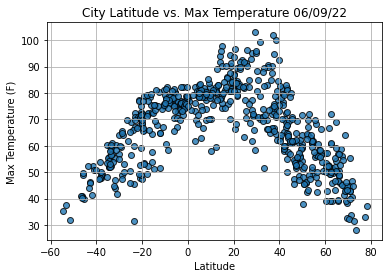

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

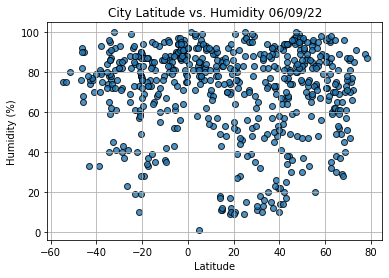

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

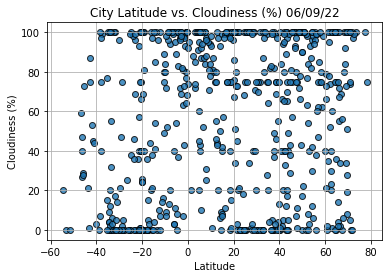

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

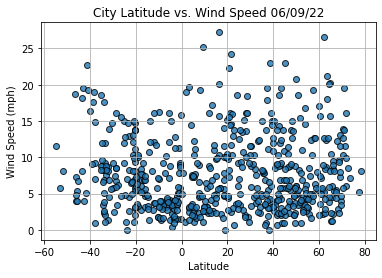

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()